In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

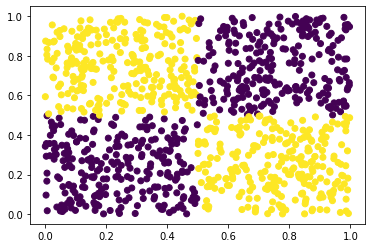

In [27]:
X1 = np.random.random(1000)
X2 = np.random.random(1000)
X1[:500] -= 1 
X2[:250] -= 1
X2[750:] -= 1
y =np.zeros(1000)
y[250:500] = 1
y[750:1000] = 1
X1 = X1*0.5
X2 = X2*0.5
X1 += 0.5
X2 += 0.5
X = np.concatenate((X1.reshape(1000,1), X2.reshape(1000,1)), axis=-1)
plt.scatter(X[:,0],X[:,1],c=y);

In [61]:
def predict(k, X):
    prediction = []
    for row in X:
        distances = np.linalg.norm(train_X - row, axis=-1)
        shortest_distances_idx = distances.argsort()[:k]
        short_distance_classes = train_y[shortest_distances_idx]
        prediction += list(stats.mode(short_distance_classes).mode)
    prediction = np.array(prediction)
    return prediction 


In [62]:
def score(k,X,y):
    p = predict(k,X)
    accuracy = ((p==y).sum())/len(X)
    return accuracy

In [63]:
train_idx = np.random.choice(len(X), int(0.85*len(X)), replace=False)
train_X = X[train_idx]
train_y = y[train_idx]
test_X = X[[x for x in range(len(X)) if x not in train_idx]]
test_y = y[[x for x in range(len(X)) if x not in train_idx]]


In [64]:
test_y.shape

(150,)

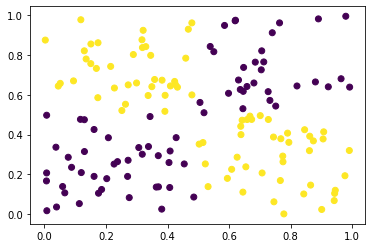

In [65]:
plt.scatter(test_X[:,0],test_X[:,1],c=test_y);

In [67]:
for k in range(1,5):
    training_accuracy = score(k,train_X, train_y)
    testing_accuracy = score(k, test_X, test_y)
    print(f"Training accuracy for k={k}: {training_accuracy}")
    print(f"Testing accuracy for k={k}: {testing_accuracy}")


Training accuracy for k=1: 1.0
Testing accuracy for k=1: 0.9466666666666667
Training accuracy for k=2: 0.9941176470588236
Testing accuracy for k=2: 0.9466666666666667
Training accuracy for k=3: 0.9952941176470588
Testing accuracy for k=3: 0.9666666666666667
Training accuracy for k=4: 0.9952941176470588
Testing accuracy for k=4: 0.9733333333333334
